In [1]:
import pandas as pd
from glob import glob


SUB_DIR  = "/playpen-ssd/levi/w4c/w4c-25/__exps__/_BEST/submission-bins-1-all-regions"
fps = glob(f"{SUB_DIR}/*/*.csv")

In [2]:
import os
import subprocess

from pathlib import Path
from src.dataloader.challenge_one_dataloader import Sat2RadDataset
from torch.utils.data import DataLoader


outdir     = "/playpen-ssd/levi/w4c/w4c-25/__exps__/_BEST/variations"
dataset    = Sat2RadDataset(split="test")
dataloader = DataLoader(dataset, num_workers=0, batch_size=1)


# 0, 16, 32
for num_buckets in [4, 8, 16, 32, 64]:

    submission_dir = Path(outdir) / Path(f"num_buckets_{num_buckets}")
    os.makedirs(submission_dir, exist_ok=True)

    sub_dir_2019   = Path(submission_dir) / Path("2019")
    sub_dir_2020   = Path(submission_dir) / Path("2020")

    os.makedirs(sub_dir_2019, exist_ok=True)
    os.makedirs(sub_dir_2020, exist_ok=True)

    preds = {}

    for fp in fps:
        
        df    = pd.read_csv(fp)
        
        # original predictions/emperical distribution
        og_preds = {}

        for row in df.iterrows():
            
            case, bucket, cum_val = row[1][0], row[1][1], row[1][2]
            if case not in og_preds:
                og_preds[case] = {
                    "buckets" : [],
                    "cum_vals": [],
                }
            og_preds[case]["buckets"].append(bucket)
            og_preds[case]["cum_vals"].append(cum_val)

        sparse_cases    = []
        sparse_buckets  = []
        sparse_cum_vals = []

        for k, v in og_preds.items():
 
            _buckets  = og_preds[k]['buckets'][::(128  // num_buckets)]
            _cum_vals = og_preds[k]['cum_vals'][::(128 // num_buckets)]
            _cases    = [k] * len(_cum_vals)

            sparse_cases.extend(_cases)
            sparse_buckets.extend(_buckets)
            sparse_cum_vals.extend(_cum_vals)

        out_fp = Path(submission_dir) / Path(fp).parent.name / Path(fp).name
        preds[str(out_fp)] = [[case, bucket, val] for case, bucket, val in zip(sparse_cases, sparse_buckets, sparse_cum_vals)]

    # save preds to csv
    for k, v in preds.items():
        df = pd.DataFrame(v)
        df.to_csv(k, index=False, header=False)

    # cd into exp dir
    os.chdir(str(submission_dir))

    # store as zip
    command = ["zip", "-r", f"../num-buckets-{num_buckets}-all-regions.zip", ".", "i", "*", "&", "exit"]
    subprocess.run(command)

Loading dataset...: 100%|██████████| 3/3 [00:00<00:00, 140.29it/s]


	zip warning: name not matched: i
	zip warning: name not matched: *
	zip warning: name not matched: &
	zip warning: name not matched: exit
  adding: 2019/ (stored 0%)
  adding: 2019/roxi_0010.test.cum4h.csv (deflated 60%)
  adding: 2019/roxi_0009.test.cum4h.csv (deflated 63%)
  adding: 2019/roxi_0008.test.cum4h.csv (deflated 72%)
  adding: 2020/ (stored 0%)
  adding: 2020/roxi_0010.test.cum4h.csv (deflated 59%)
  adding: 2020/roxi_0009.test.cum4h.csv (deflated 56%)
  adding: 2020/roxi_0008.test.cum4h.csv (deflated 58%)
	zip warning: name not matched: i
	zip warning: name not matched: *
	zip warning: name not matched: &
	zip warning: name not matched: exit
  adding: 2019/ (stored 0%)
  adding: 2019/roxi_0010.test.cum4h.csv (deflated 60%)
  adding: 2019/roxi_0009.test.cum4h.csv (deflated 63%)
  adding: 2019/roxi_0008.test.cum4h.csv (deflated 72%)
  adding: 2020/ (stored 0%)
  adding: 2020/roxi_0010.test.cum4h.csv (deflated 59%)
  adding: 2020/roxi_0009.test.cum4h.csv (deflated 58%)
  add

In [3]:
fp, og_preds.keys()

('/playpen-ssd/levi/w4c/w4c-25/__exps__/_BEST/submission-bins-1-all-regions/2020/roxi_0008.test.cum4h.csv',
 dict_keys(['RIG3', 'TAL3', 'TUR4', 'WAW2', 'RIG4', 'TAL4', 'SPT4', 'WAW3', 'JYV4', 'OUL5', 'OUL6', 'WAW4', 'HEL4', 'OUL7']))

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt


x = torch.load("/playpen-ssd/levi/w4c/w4c-25/___old___/11-4-25-y_reg_norms.pth")
x_arr = x.numpy()

In [4]:
x_non_zero = x[x > 0.1]

x_non_zero.__len__()

29715

(array([2.5631e+04, 3.0980e+03, 7.1800e+02, 1.8700e+02, 4.9000e+01,
        2.2000e+01, 9.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([0.10000634, 0.35160685, 0.60320735, 0.85480785, 1.10640836,
        1.35800886, 1.60960937, 1.86120987, 2.11281037, 2.36441088]),
 <BarContainer object of 9 artists>)

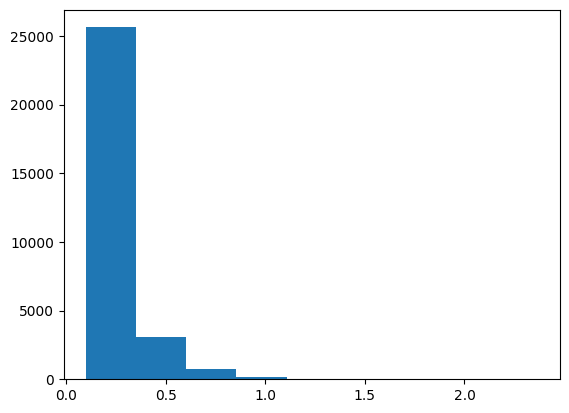

In [13]:
plt.hist(x_non_zero, bins=9)